# Feature Engineering

In this notebook we will learn how to standardize and normalize data using Python **Scikit-learn**.

One of the common requirements for almost every ML estimator is the standardization and normalization of datasets. 

It is because if the individual features of the dataset do not more or less look like standard normally distributed data, our ML model might not provide us with the desired result.

# Standardize Data using Scikit-learn

The standardized data has zero mean and unit variance. The Preprocessing module of the Scikit-learn library provides us the StandardScaler utility class to scale our training data.

## Example

In the below given example, we will scale the data to zero mean and unit variance

In [9]:
# Importing the necessary packages
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
# Providing the training data
training_data = np.array([[ 1., -2., 3.],
                        [ 2., 1., 0.],
                        [ 0., 1., -2.]])

In [11]:
print(training_data)

[[ 1. -2.  3.]
 [ 2.  1.  0.]
 [ 0.  1. -2.]]


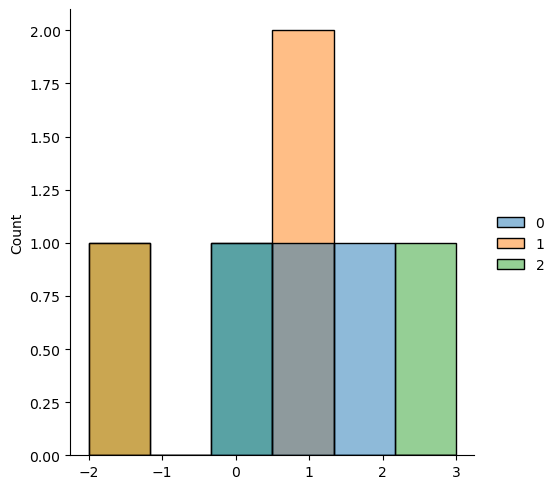

In [12]:
sns.displot(training_data)

In [13]:
Stdscaler = preprocessing.StandardScaler().fit(training_data)
Scaled_data = Stdscaler.transform(training_data)

In [14]:
print(Scaled_data)

[[ 0.         -1.41421356  1.29777137]
 [ 1.22474487  0.70710678 -0.16222142]
 [-1.22474487  0.70710678 -1.13554995]]


<AxesSubplot:ylabel='Count'>

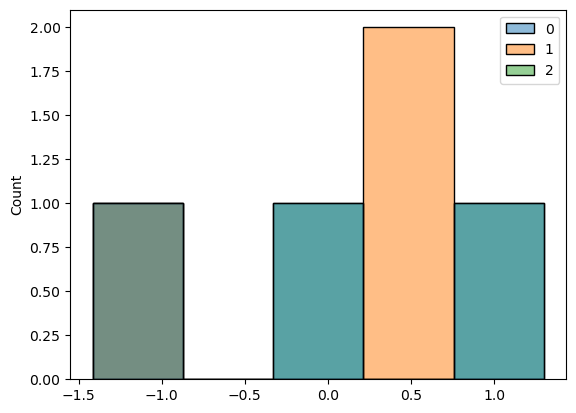

In [15]:
sns.histplot(Scaled_data)

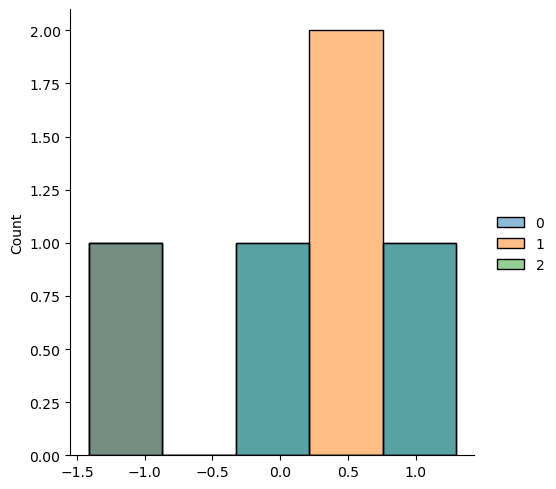

In [16]:
sns.displot(Scaled_data)

In [17]:
# Let’s check out the scaled data for zero mean:
Scaled_data.mean(axis=0)

array([0., 0., 0.])

In [18]:
# Let’s check out the scaled data for unit variance −
Scaled_data.std(axis=0)

array([1., 1., 1.])

In [19]:
training_data_df = pd.DataFrame(training_data)
Scaled_data_df = pd.DataFrame(Scaled_data)

In [20]:
training_data_df.describe()

,0,1,2
count,3.0,3.000000,3.000000
mean,1.0,0.000000,0.333333
std,1.0,1.732051,2.516611
min,0.0,-2.000000,-2.000000
25%,0.5,-0.500000,-1.000000
50%,1.0,1.000000,0.000000
75%,1.5,1.000000,1.500000
max,2.0,1.000000,3.000000


In [21]:
Scaled_data_df.describe()

,0,1,2
count,3.000000,3.000000,3.000000
mean,0.000000,0.000000,0.000000
std,1.224745,1.224745,1.224745
min,-1.224745,-1.414214,-1.135550
25%,-0.612372,-0.353553,-0.648886
50%,0.000000,0.707107,-0.162221
75%,0.612372,0.707107,0.567775
max,1.224745,0.707107,1.297771


In [25]:
# check for std = 1
scaled_data_np = np.array(list(Scaled_data_df.values))
pd.Series(scaled_data_np.flatten()).describe()

count    9.000000
mean     0.000000
std      1.060660
min     -1.414214
25%     -1.135550
50%      0.000000
75%      0.707107
max      1.297771
dtype: float64

# Normalize Data using Scikit-learn

Normalization is one of the most common feature scaling techniques. It is used when we want to bound our data between 0 and 1. Normalization also known as Min-Max scaling.

The Preprocessing module of the Scikit-learn library provides us the **MinMaxScaler** utility class to normalize our data. 

The formula for **MinMaxScaler** is as follows : $ x_{new}\:=\:\frac{x\:-\:x_{min}}{x_{max}\:-\:x_{min}} $

In the above equation, $ xmax $ is the maximum value and $ 𝑥min $ is the minimum values of the feature column:

$ xnew $ will be 0 when the value of $ x $ is the minimum value in the column.

$ xnew $ will be 1 when the value of $ x $ is the maximum value in the column.

$ xnew $ will be between 0 and 1 when the value of $ x $ is between minimum and maximum value in the column.

## Example 

The below example will normalize the values of the Pima-Indians-Diabetes dataset in the range of 0 and 1 −

In [26]:
# Importing the necessary packages
import sklearn
from numpy import set_printoptions
from sklearn import preprocessing

In [27]:
# Loading the dataset from local directory
data = pd.read_csv("AmesHousing.csv")
array = data['SalePrice'].to_numpy()
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [28]:
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [29]:
data['SalePrice']

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2930, dtype: int64

In [30]:
data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [31]:
# Printing the first 10 data rows in the input
print(data['SalePrice'][0:10])

0    215000
1    105000
2    172000
3    244000
4    189900
5    195500
6    213500
7    191500
8    236500
9    189000
Name: SalePrice, dtype: int64


In [33]:
array = data['SalePrice'].values.reshape(-1, 1)
# Normalizing the data in the range of 0 and 1 using MinMaxScaler
MinMax_Scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_normalized = MinMax_Scaler.fit_transform(array)

In [34]:
# Printing the first 10 normalized data rows in the output
# Setting the precision of the output data to 2 digits
set_printoptions(precision=2)
print(data_normalized[0:10])

[[0.27]
 [0.12]
 [0.21]
 [0.31]
 [0.24]
 [0.25]
 [0.27]
 [0.24]
 [0.3 ]
 [0.24]]


In [35]:
data_normalized.min()

0.0

In [36]:
data['SalePrice'].max()

755000

In [37]:
data['SalePrice'].min()

12789

## Interquartile range method

The interquartile range (IQR) tells you the range of the middle half of your dataset. You can use the IQR to create “fences” around your data and then define outliers as any values that fall outside those fences.

1. Sort your data from low to high

2. Identify the first quartile (Q1), the median, and the third quartile (Q3).

3. Calculate your IQR = Q3 – Q1

4. Calculate your upper fence = Q3 + (1.5 * IQR)

5. Calculate your lower fence = Q1 – (1.5 * IQR)

6. Use your fences to highlight any outliers, all values that fall outside your fences.

Your outliers are any values greater than your upper fence or less than your lower fence.

In [38]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [39]:
# Reading the dataset
data = pd.read_csv("iqr_dataset.csv")
print("The shape of the dataframe is: ", data.shape)

The shape of the dataframe is:  (20, 3)


In [40]:
# check first 5 rows of the data.
data.head()

,Height (in cm),Width (in cm),Area (in cm2)
0,38,16,608
1,36,14,504
2,38,13,494
3,5,23,115
4,34,30,1020


In [41]:
# Check number of rows, columns and their dtypes using the info() command.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Height (in cm)  20 non-null     int64
 1   Width (in cm)   20 non-null     int64
 2   Area (in cm2)   20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [42]:
# We can observe some statistical information about this dataset using data.describe() method, which can be done as: 
data.describe()

,Height (in cm),Width (in cm),Area (in cm2)
count,20.000000,20.000000,20.000000
mean,34.900000,28.550000,1375.300000
std,21.975824,20.085279,1956.310574
min,5.000000,2.000000,12.000000
25%,29.500000,15.500000,501.500000
50%,35.500000,28.500000,986.000000
75%,39.000000,32.250000,1207.500000
max,90.000000,82.000000,7052.000000


It can be observed that features such as **‘Height’, ‘Width’, ‘Area’** have very deferred **maximum value** as compared to the **75% value**, thus we can say there are certain observations that act as outliers in the dataset. Similarly, the **minimum value** in these columns differs greatly from the **25% value**, so it signifies the presence of outliers. 

In [43]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "iqr_graph.png")

You can use a box plot, or a box-and-whisker plot, so you can see the data distribution  of the above features. This highlights minimum and maximum values (the range), the median, and the interquartile range for your data.

C:\Users\moham.DESKTOP-3UOA6L4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


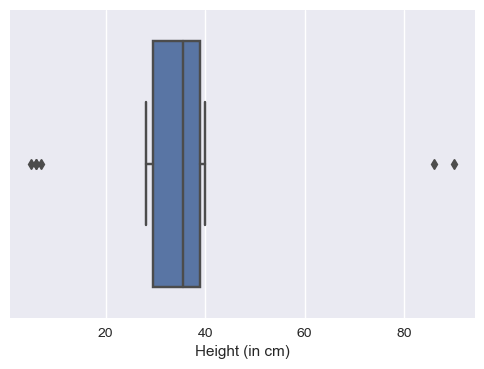

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(data['Height (in cm)'])
plt.show()

We can observe the presence of outliers beyond the first quartile and the third quartile in the box plot.

C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


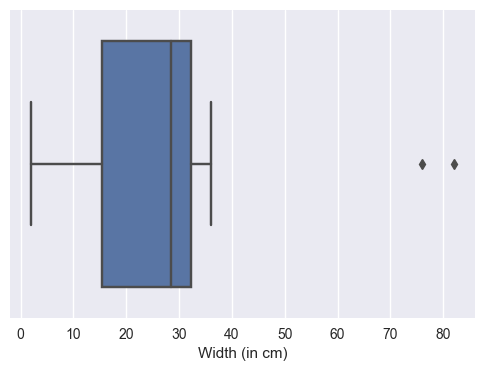

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(data['Width (in cm)'])
plt.show()

C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


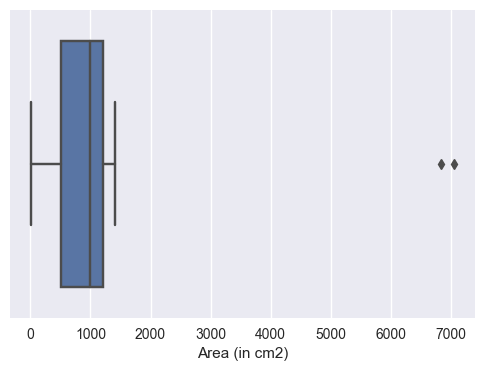

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(data['Area (in cm2)'])
plt.show()

To find out and filter such outliers in the dataset we will use the IQR formula to help us. 

Our task is to : 

1. Find the **IQR value**. 
2. Select values that lie outside the **lower fence** and **upper_fence** region and remove them. 

In [55]:
# Select a column
col = 'Height (in cm)' #, 'Width (in cm)', 'Area (in cm2)'

# We use numpy .quantile() function to select the Q3 and Q1 values.
Q3 = np.quantile(data[col], 0.75)
Q1 = np.quantile(data[col], 0.25)
print(f"Q1 and Q3 values for column {col} are: {Q1}, {Q3}")


# Calculate your IQR = Q3 – Q1
IQR = Q3 - Q1
print(f"IQR value for column {col}s is: {IQR}")


#Calculate your upper fence = Q3 + (1.5 * IQR)
upper_range = Q3 + 1.5 * IQR
print(f"upper fence value for column {col} is: {upper_range}")


# Calculate your lower fence = Q1 – (1.5 * IQR)
lower_range = Q1 - 1.5 * IQR
print(f"lower fence value for column {col} is: {lower_range}")

Q1 and Q3 values for column Height (in cm) are: 29.5, 39.0
IQR value for column Height (in cm)s is: 9.5
upper fence value for column Height (in cm) is: 53.25
lower fence value for column Height (in cm) is: 15.25


In [57]:
# Check data: Rows 3, 7, 11, 15, 19 are outliers.
data[col]

0     38
1     36
2     38
3      5
4     34
5     35
6     39
7     86
8     30
9     33
10    39
11     7
12     6
13    28
14    32
15    90
16    37
17    39
18    40
19     6
Name: Height (in cm), dtype: int64

In [60]:
# Previous shape
data.shape

(20, 3)

In [61]:
# Remove outliers
data_filtered = data.loc[(data[col] > lower_range) & (data[col] < upper_range)]

In [63]:
# New shape
data_filtered.shape

(14, 3)

## Outliers: Using Plots (Housing Data)

Goal: Predict the label (y) : **SalePrice**, using provided features (X).

check if there are sale prices that can be considered as outliers (extreme values).

Explore features that are **highly correlated** to the label "SalePrice".

In [70]:
housing_df = pd.read_csv("AmesHousing.csv")

In [71]:
housing_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [72]:
# Show correlation of each feature with all other features, including the label. 
housing_df.corr()

C:\Users\Mounir.Hafsa\AppData\Local\Temp\ipykernel_13532\1671556680.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_df.corr()


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


C:\Users\Mounir.Hafsa\AppData\Local\Temp\ipykernel_13532\2192135761.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_df.corr())


<AxesSubplot:>

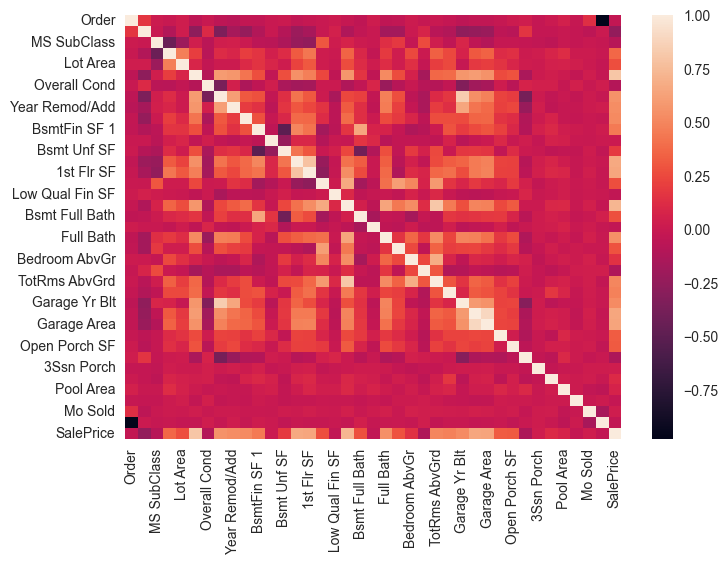

In [91]:
# Let's explore this using a heatmap.
sns.heatmap(housing_df.corr())

In [85]:
# Show correlation of only the label. 
housing_df.corr()['SalePrice'].sort_values()
# Every single features correlation with the sales price. Sorting them from most correlated to lowest correlated.

C:\Users\Mounir.Hafsa\AppData\Local\Temp\ipykernel_13532\3852519896.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_df.corr()['SalePrice'].sort_values()


PID               -0.246597
Enclosed Porch    -0.128819
Kitchen AbvGr     -0.119830
Overall Cond      -0.101741
MS SubClass       -0.085088
Low Qual Fin SF   -0.037666
Bsmt Half Bath    -0.035995
Order             -0.031438
Yr Sold           -0.030541
Misc Val          -0.019311
BsmtFin SF 2       0.005874
3Ssn Porch         0.032219
Mo Sold            0.035092
Pool Area          0.071844
Screen Porch       0.112140
Bedroom AbvGr      0.143969
Bsmt Unf SF        0.182874
2nd Flr SF         0.269954
Lot Area           0.270518
Bsmt Full Bath     0.276821
Half Bath          0.285355
Open Porch SF      0.317649
Wood Deck SF       0.327985
Lot Frontage       0.367561
BsmtFin SF 1       0.450028
Fireplaces         0.476386
TotRms AbvGrd      0.500005
Mas Vnr Area       0.514516
Garage Yr Blt      0.527500
Year Remod/Add     0.533411
Full Bath          0.546369
Year Built         0.558918
Garage Area        0.644372
1st Flr SF         0.645589
Garage Cars        0.648457
Total Bsmt SF      0

C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

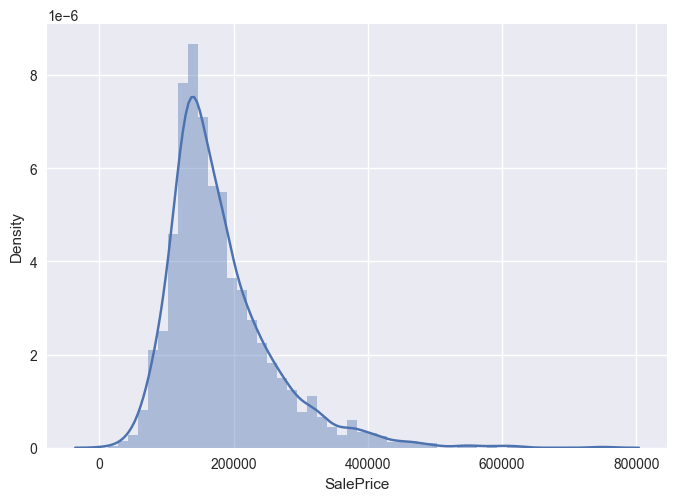

In [90]:
# Explore the distribution plot of the label.
sns.distplot(housing_df["SalePrice"])
# Follows a normal distribution.

In [87]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "Distribution.png")

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

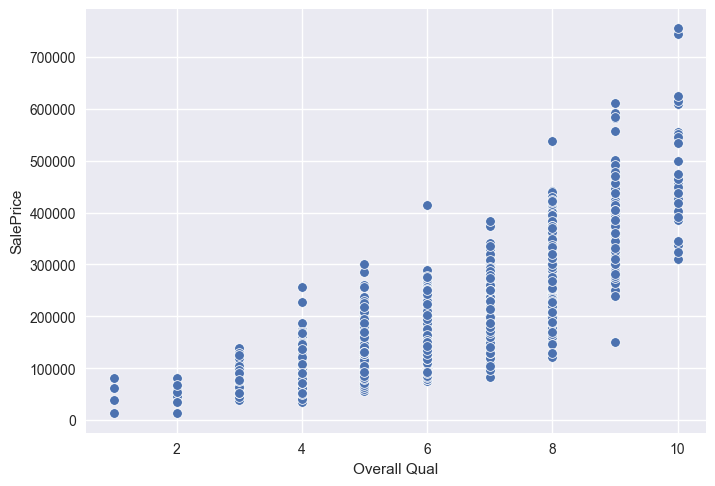

In [84]:
# Explore the relationship between the label and the most correlated feature.
sns.scatterplot(x="Overall Qual", y="SalePrice", data=housing_df)

You can see that this is different from the typical scatterplot you see often, this is because the overall quality column is a rating from 1 to 10.
 
We can see that some points can be considered as outliers. Since there is a positive linear relationship with house prices increasing with higher overall quality:
 
1. From the lower right we can see some houses that are rated both 9 and 10 which means they are high quality houses, but their prices are way lower for that category, instead they are priced as a 5-6 rating house.
 
2. From the upper middle we can some houses selling for way more that what you expect for the same quality. 

In [75]:
housing_df[(housing_df["Overall Qual"] > 8) & (housing_df["SalePrice"] < 200000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

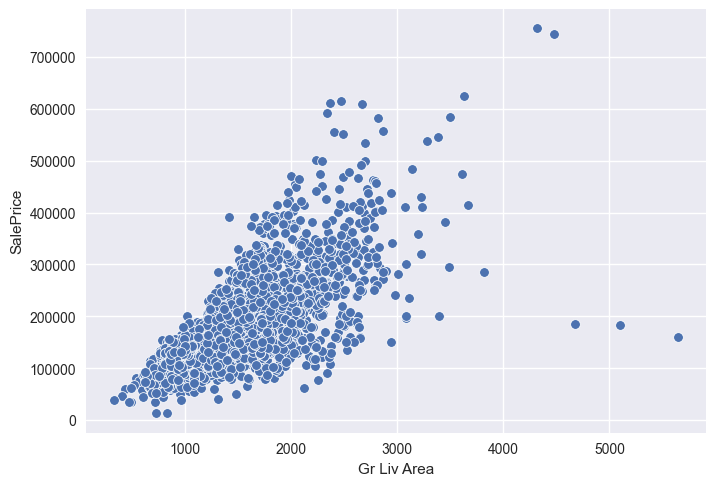

In [76]:
# Explore the relationship between the label and the second most correlated feature (Living Area).
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=housing_df)

Here we have at the lower right, the same three houses, where they have the highest living area but prices at lower prices.
using pandas we can find more informations about these houses.

In [77]:
housing_df[(housing_df["Gr Liv Area"] > 4000) & (housing_df["SalePrice"] < 400000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Since we want our model to follow a perfect linear relationship and avoid learning from data that doesnt respect that trend. Its highly recommended to delete these houses. The general trend is, higher quality, higher living space equals higher selling price. While these rows dont respect that (for what ever reason) they cant be considered into the model.

In [78]:
#use the property id (PID) to remove these rows.
drop_index_values = housing_df[(housing_df["Gr Liv Area"] > 4000) & (housing_df["SalePrice"] < 400000)].index
print(drop_index_values)

Int64Index([1498, 2180, 2181], dtype='int64')


In [79]:
housing_df = housing_df.drop(drop_index_values, axis=0) # axis=0 to apply this to rows.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

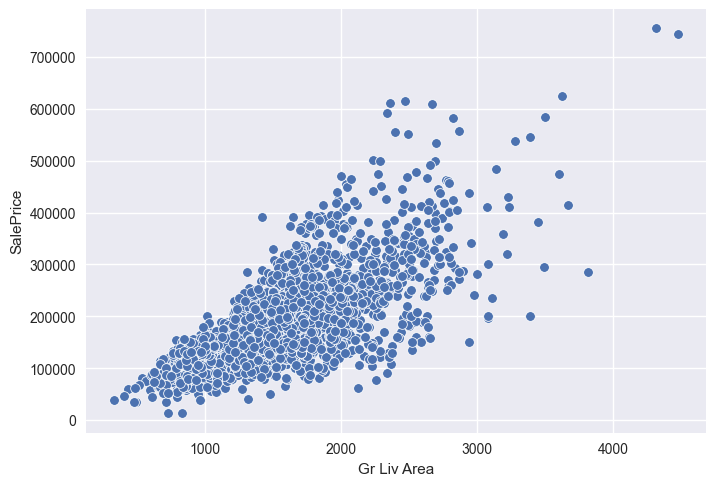

In [80]:
# Explore the relationship between the label and the second most correlated feature (Living Area).
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=housing_df)

Keep in mind that this is purely domain-dependent.  This means that the 3 houses we just dropped could have a massive influence if the business question changed. Let's say, that these values were the most recent ones from a specific region, this could signal that the area is changing and future house prices and going to drop drastically in the near future. 

<AxesSubplot:xlabel='Gr Liv Area'>

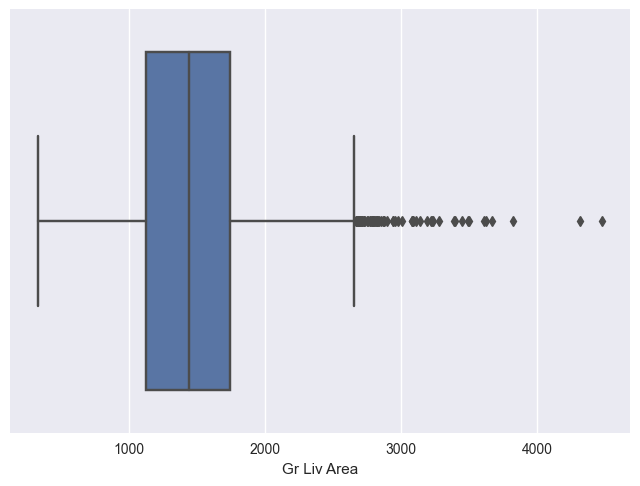

In [81]:
# We can also use boxplot to review the same column
sns.boxplot(x="Gr Liv Area", data=housing_df)

In [82]:
# Save the changes applied on this dataframe to csv.
housing_df.to_csv("AmesHousing_outliers_removed.csv",index=False)

# Missing Data: Housing Data

We already reviewed Pandas operations for missing data, now let's apply this to clean a real data file. 

Keep in mind, there is **no 100% correct way of doing this**, and this notebook just serves as an example of some reasonable approaches to take on this data.

#### Note: Throughout this section we will be slowly cleaning and adding features to the Ames Housing Dataset.

#### 2nd Note: Some of the methods shown here may not lead to optimal performance, but instead are shown to display examples of various methods available.

In [93]:
df = pd.read_csv("AmesHousing_outliers_removed.csv")

In [94]:
df.head()

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [95]:
len(df.columns)

83

In [97]:
# arround 3000 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2927 non-null   int64  
 1   Order            2927 non-null   int64  
 2   PID              2927 non-null   int64  
 3   MS SubClass      2927 non-null   int64  
 4   MS Zoning        2927 non-null   object 
 5   Lot Frontage     2437 non-null   float64
 6   Lot Area         2927 non-null   int64  
 7   Street           2927 non-null   object 
 8   Alley            198 non-null    object 
 9   Lot Shape        2927 non-null   object 
 10  Land Contour     2927 non-null   object 
 11  Utilities        2927 non-null   object 
 12  Lot Config       2927 non-null   object 
 13  Land Slope       2927 non-null   object 
 14  Neighborhood     2927 non-null   object 
 15  Condition 1      2927 non-null   object 
 16  Condition 2      2927 non-null   object 
 17  Bldg Type     

### Removing the PID

We already have an index, so we don't need the PID unique identifier. (# Can also be used as index, in case of unique timestamps e.g., financial analysis)

In [98]:
df = df.drop('PID',axis=1)

In [99]:
len(df.columns)

82

## Observing NaN Features

Using the .isnull() function of pandas.

In [100]:
df.isnull()

,Unnamed: 0,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,False,False,True,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False


In [101]:
# Sum number of missing values for each column

df.isnull().sum()

Unnamed: 0          0
Order               0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [103]:
# Turn sum of missing values to percentage compared to total number of rows
100* df.isnull().sum() / len(df)

Unnamed: 0         0.00000
Order              0.00000
MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 82, dtype: float64

In [104]:
# turn this into a function
def percent_missing(df):
    # return number of missing values per column.
    percent_nan = 100* df.isnull().sum() / len(df)
    # keep columns with positive number of missing values.
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [105]:
percent_nan = percent_missing(df)

In [108]:
# Only 27 columns are considered from 82 arround 40% are columns missing data. 
len(percent_nan)

27

In [110]:
# Check the amount of missing data per column
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

 We have columns with only 1 missing row (0.034165) or 2 rows (0.068329) which is the double of (0.034165). 

In [112]:
# Running this returns 0.034165 which gives us the equivalent of one line percentage for this dataframe.
100/len(df)

0.0341646737273659

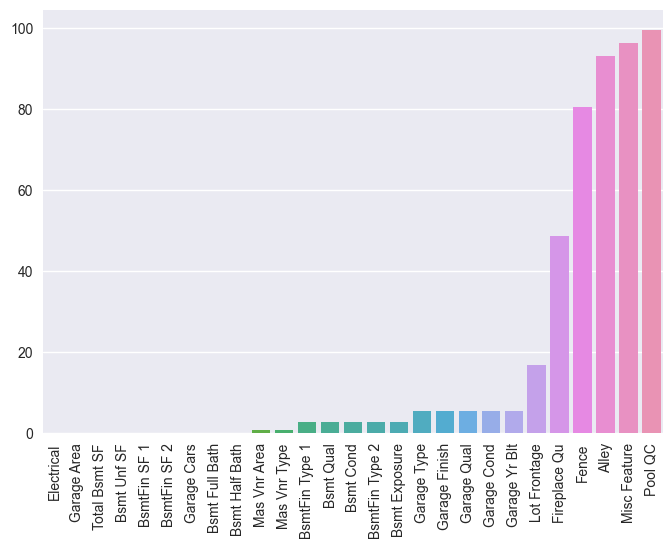

In [113]:
# Lets plot the data, use index as x-axis, and percentage of missing value for the y-axis.
# rotate to 90° the x-axis values (column names) for better visibility.
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

We can see that most columns are relative to a certain aspect of the data set. Bsmt or "basement" columns like [basement surface, unfinished surface, finished surface, full bath, halfbath, quality, exposure] are relative to having a basement or not. So some houses that don't have basement would be normal not to have these informations available. Similar for Garage features like [Garage type, finish, quality, condition] are relative to a have having a garage or not. 

# Removing Features or Removing Rows

If only a few rows relative to the size of your dataset are missing some values, then it might just be a good idea to drop those rows. What does this cost you in terms of performace? It essentialy **removes potential training/testing data**, but if its only a few rows, its unlikely to change performance.

Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider **why it has so many null values**, in certain situations **null could just be used as a separate category**. 

Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your **domain expertise and knowledge of the data set!**

## Working based on Rows Missing Data

## Filling in Data or Dropping Data?

Let's explore how to choose to remove or fill in missing data for rows that are missing some data. 

Let's choose some **threshold where we decide it is ok to drop a row if its missing some data** (instead of attempting to fill in that missing data point). 

We will choose **1% as our threshold**. This means if less than 1% of the rows are missing this feature, we will consider just dropping that row, instead of dealing with the feature itself. 

There is no right answer here, just use common sense and your domain knowledge of the dataset, obviously you don't want to drop a very high threshold like 50% , you should also explore correlation to the dataset, maybe it makes sense to drop the feature instead.

Based on the text description of the features, you will see that most of this missing data is actually NaN on purpose as a placeholder for 0 or "none".

## Example of Filling in Data : Basement Columns

(0.0, 1.0)

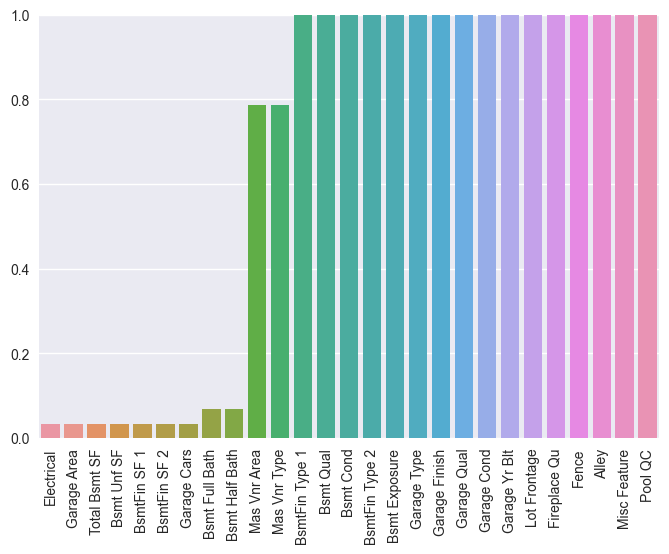

In [114]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Set 1% Threshold on features.
plt.ylim(0,1)

Let's drop or fill the rows based on this data. You could either manually fill in the data OR you could simply drop the row and not consider it.

In [115]:
# Select columns having < 1% of data.
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [118]:
# Check if the row missing in Electrical is also missing in other informations like Garage Area
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [120]:
df[df['Bsmt Full Bath'].isnull()] 
# Missing in two rows. # Any house wihtout a basement will have these Nan values repalced to indicate no Basement.

,Unnamed: 0,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [121]:
df[df['Bsmt Half Bath'].isnull()] 
# Missing in two rows.

,Unnamed: 0,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

The numerical basement columns:

In [123]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0) #Replace NaN with 0

The string basement columns:

In [122]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None') #Replace NaN with 'None'

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [124]:
percent_nan = percent_missing(df)

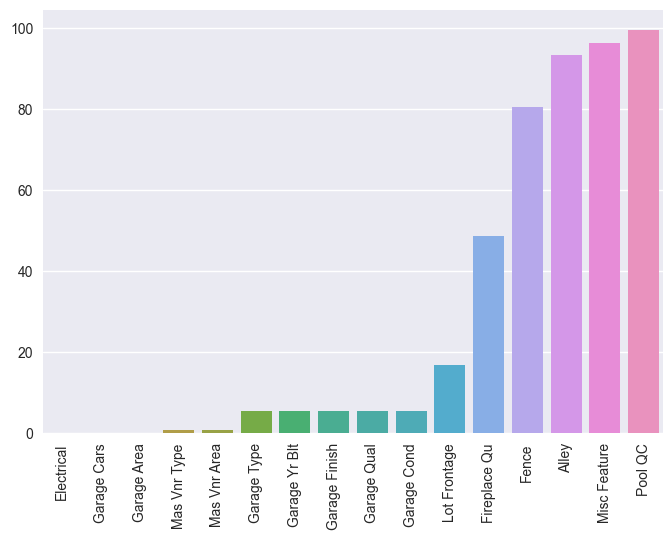

In [125]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Dropping Rows

A few of these features appear that it is just one or two rows missing the data. We could also fill in these data points easily, and that is the more correct approach, but here we show how to drop in case you find yourself in a situation where it makes more sense to drop a row, based on missing column features.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [126]:
# Dropping only 1 row for each feature.
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [127]:
percent_nan = percent_missing(df)

(0.0, 1.0)

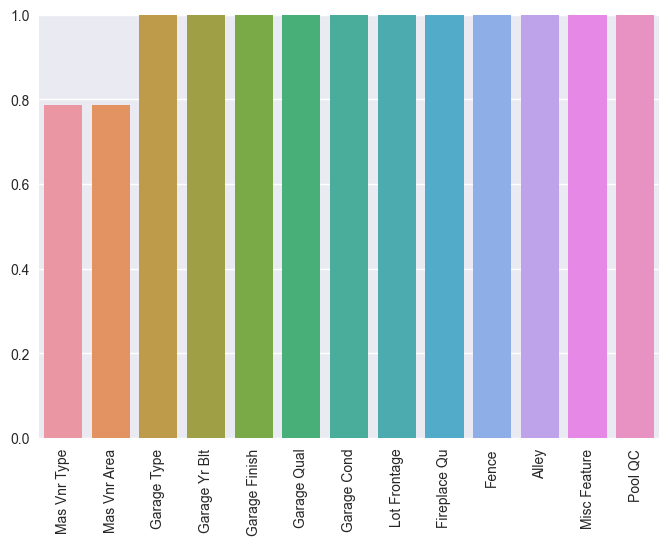

In [128]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

### Mas Vnr Feature 

Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a **masonry veneer**, in which case, we will fill in this data as we did before.

In [129]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

C:\Users\Mounir.Hafsa\AppData\Local\Temp\ipykernel_13532\3189550505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
C:\Users\Mounir.Hafsa\AppData\Local\Temp\ipykernel_13532\3189550505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)


In [130]:
percent_nan = percent_missing(df)

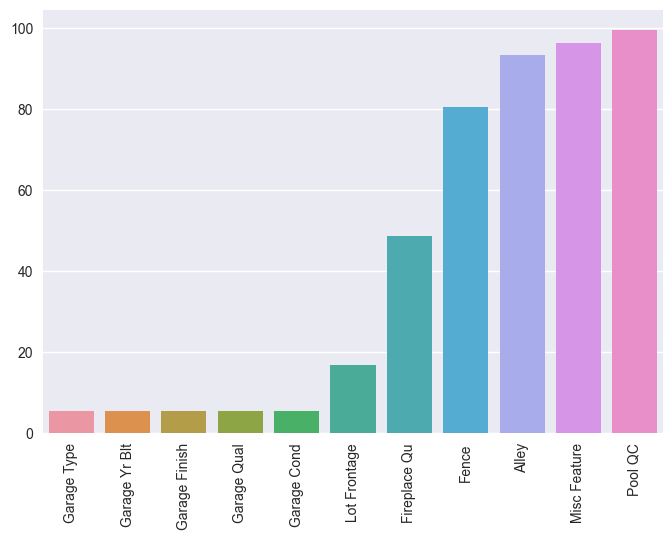

In [131]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Filling In Missing Column Data

Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

### Garage Columns

These NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [133]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]
# Where no Garage type is indicated this means that no garage is found, instead of NaN, this is replaced to None.

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2922,Detchd,Unf,TA,TA
2923,Attchd,Unf,TA,TA
2924,NaN,NaN,NaN,NaN
2925,Attchd,RFn,TA,TA


In [134]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

C:\Users\Mounir.Hafsa\AppData\Local\Temp\ipykernel_13532\3301184589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[gar_str_cols] = df[gar_str_cols].fillna('None')


In [135]:
#Numeric Features are replaced by 0.
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

C:\Users\Mounir.Hafsa\AppData\Local\Temp\ipykernel_13532\1372967374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)


In [136]:
percent_nan = percent_missing(df)

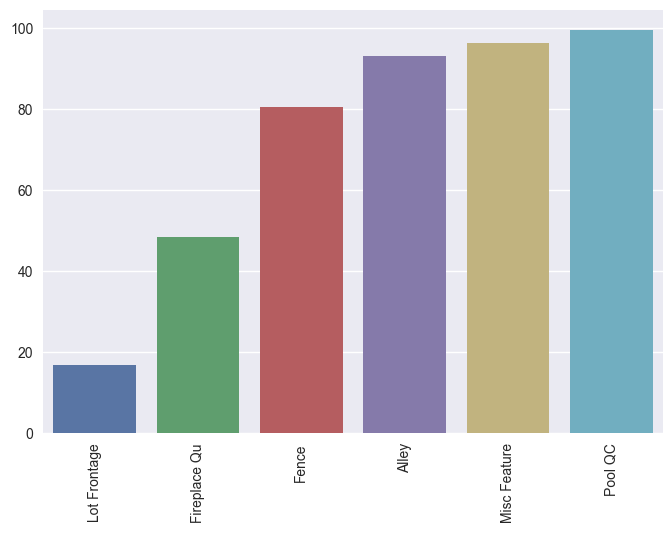

In [137]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Dropping Feature Columns

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. 

In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0. But for the sake of showing variations on dealing with missing data, we will remove these features, instead of filling them in with the appropriate value.

In [138]:
percent_nan.index
# retreive column names.

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [139]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2922,37.0,NaN,GdPrv,NaN,NaN,NaN
2923,NaN,NaN,MnPrv,NaN,NaN,NaN
2924,62.0,NaN,MnPrv,NaN,Shed,NaN
2925,77.0,TA,NaN,NaN,NaN,NaN


In [140]:
# Drop columns with over 80% of missing data.
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [141]:
percent_nan = percent_missing(df)

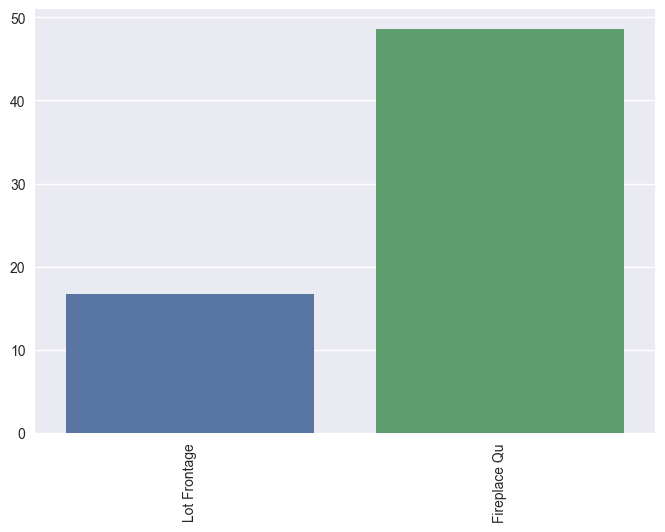

In [142]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [143]:
### Filling in Fireplace Quality based the fact that NA means that are no fireplaces. 
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [144]:
percent_nan = percent_missing(df)

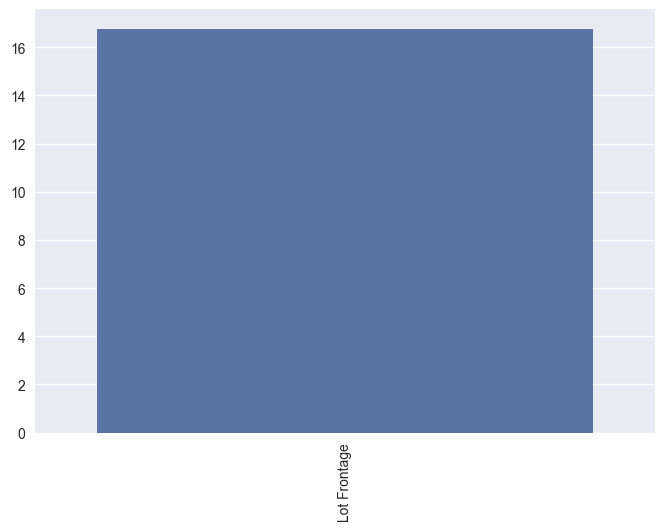

In [145]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) of Missing Data

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the **Lot Frontage** is related to what **neighborhood** a house is in.

In [146]:
# Explore Neighborhood values
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

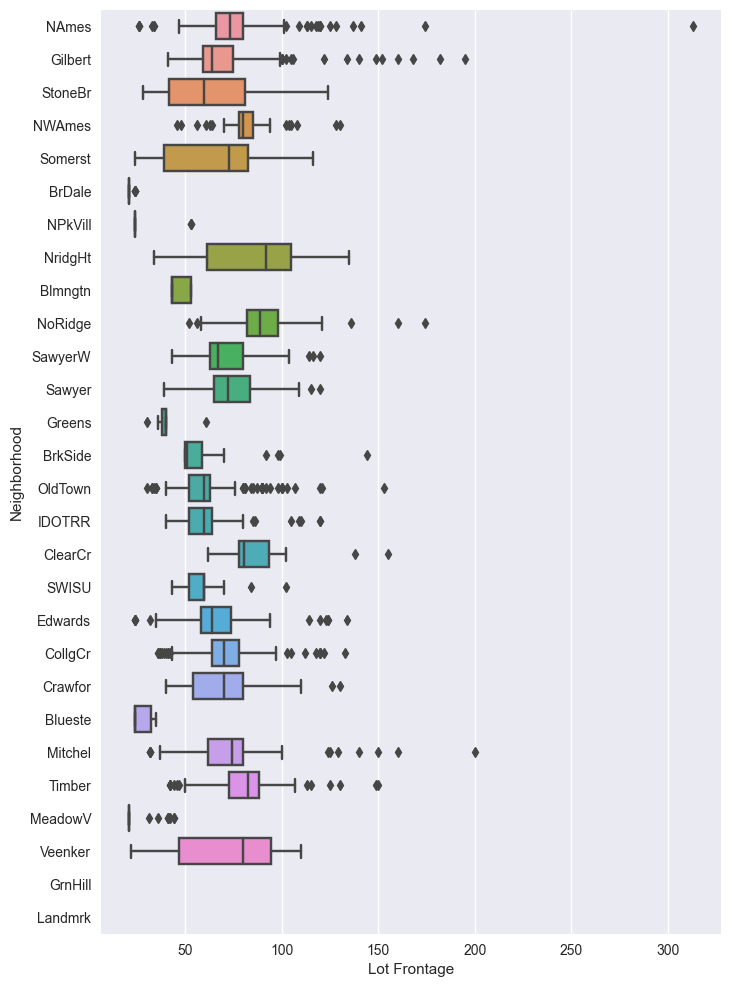

In [147]:
# Plot these neighborhood with lot frontage
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

We can see that most of neighborhood have a fair amount of outliers, however, we can safely say that the median lot frontage is fairly unique per neighborhood so we can use it to replace null values.

## Impute Missing Data based on other Features

There are more complex methods, but usually the simpler the better, it avoids building models on top of other models.

More Info on Options: https://scikit-learn.org/stable/modules/impute.html

In [151]:
df.groupby('Neighborhood')['Lot Frontage'].mean()
# Retreive the mean lot frontage per neighborhood

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

GrnHill and Landmrk are two neighborhood that have NaN which means using the mean is useless for any house located in those neighborhoods and having a Lot Frontage = NaN will simply be replaced to 0.

## Transform Column

Apply these values on missing values found in Lot Frontage.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html

In [154]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda lf_value: lf_value.fillna(lf_value.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [153]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda lf_value: lf_value.fillna(lf_value.mean()))

In [155]:
# Replace the remaining values with 0
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [156]:
percent_nan = percent_missing(df)

In [157]:
percent_nan

Series([], dtype: float64)

Great! We no longer have any missing data in our entire data set! Keep in mind, we should eventually turn all these transformations into an easy to use function. For now, lets' save this dataset:

In [158]:
df.to_csv("Ames_NO_Missing_Data.csv",index=False)

# Dealing with Categorical Data

Many machine learning models can not deal with categorical data set as strings. 

For example linear regression can not apply a a Beta Coefficent to colors like "red" or "blue". 

Instead we need to convert these categories into "dummy" variables, otherwise known as "one-hot" encoding.

## Data

We will open the .csv file that has been "cleaned" to remove outliers and NaN from the previous section.

In [159]:
df = pd.read_csv("Ames_NO_Missing_Data.csv")

In [160]:
df.head()

,Unnamed: 0,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,1,2,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,2,3,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,3,4,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,4,5,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


## Numerical Column to Categorical

We need to be careful when it comes to encoding categories as numbers. We want to make sure that the numerical relationship makes sense for a model. For example, the encoding MSSubClass is essentially just a number code per class:

    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

The number itself does not appear to have a relationship to the other numbers. While 30 > 20 is True, it doesn't really make sense that "1-STORY 1945 & OLDER" > "1-STORY 1946 & NEWER ALL STYLES". Keep in mind, this isn't always the case, for example 1st class seats versus 2nd class seats encoded as 1 and 2. Similar with Quality, where 10 is better than 1 (a relationship exists).

Make sure you fully understand your data set to examine what needs to be converted/changed.

### MSSubClass

In [161]:
# Convert Numbers to String
df['MS SubClass'] = df['MS SubClass'].apply(str)

# Creating "Dummy" Variables

## Avoiding MultiCollinearity and the Dummy Variable Trap

https://stats.stackexchange.com/questions/144372/dummy-variable-trap

In [163]:
person_state =  pd.Series(['Dead','Alive','Dead','Alive','Dead','Dead'])

In [164]:
person_state

0     Dead
1    Alive
2     Dead
3    Alive
4     Dead
5     Dead
dtype: object

In [165]:
# get_dummies() makes it easier to convert a column of string features to dummy variables.
pd.get_dummies(person_state)

,Alive,Dead
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1


In [166]:
# we can drop one column and still retain full information on the data.
pd.get_dummies(person_state,drop_first=True)

,Dead
0,1
1,0
2,1
3,0
4,1
5,1


## Creating Dummy Variables from Object Columns

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

In [167]:
# Select only columns having a dtype = object (String data).
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [168]:
# Select only columns with specific type.

# Exclude string datatype
df_nums = df.select_dtypes(exclude='object')
# Include string datatype
df_objs = df.select_dtypes(include='object')

In [169]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2925 non-null   int64  
 1   Order            2925 non-null   int64  
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Overall Qual     2925 non-null   int64  
 5   Overall Cond     2925 non-null   int64  
 6   Year Built       2925 non-null   int64  
 7   Year Remod/Add   2925 non-null   int64  
 8   Mas Vnr Area     2925 non-null   float64
 9   BsmtFin SF 1     2925 non-null   float64
 10  BsmtFin SF 2     2925 non-null   float64
 11  Bsmt Unf SF      2925 non-null   float64
 12  Total Bsmt SF    2925 non-null   float64
 13  1st Flr SF       2925 non-null   int64  
 14  2nd Flr SF       2925 non-null   int64  
 15  Low Qual Fin SF  2925 non-null   int64  
 16  Gr Liv Area      2925 non-null   int64  
 17  Bsmt Full Bath

In [170]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qu

### Converting

In [171]:
df_objs = pd.get_dummies(df_objs, drop_first=True)

In [172]:
df_objs

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2921,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [173]:
# Concat dummy columns with numerical columns
final_df = pd.concat([df_nums,df_objs],axis=1)

In [174]:
final_df

,Unnamed: 0,Order,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,1,141.000000,31770,6,5,1960,1960,112.0,639.0,...,0,0,0,0,1,0,0,0,1,0
1,1,2,80.000000,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
2,2,3,81.000000,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
3,3,4,93.000000,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,0,1,0,0,0,1,0
4,4,5,74.000000,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2925,2926,37.000000,7937,6,6,1984,1984,0.0,819.0,...,0,0,0,0,1,0,0,0,1,0
2921,2926,2927,75.144444,8885,5,5,1983,1983,0.0,301.0,...,0,0,0,0,1,0,0,0,1,0
2922,2927,2928,62.000000,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,1,0,0,0,1,0
2923,2928,2929,77.000000,10010,5,5,1974,1975,0.0,1071.0,...,0,0,0,0,1,0,0,0,1,0


## Final Thoughts

Keep in mind, we don't know if 270 columns is very useful. More columns doesn't necessarily lead to better results. 

In fact, we may want to further remove columns. What we have done here has greatly expanded the ratio of rows to columns, which may actually lead to worse performance (however you don't know until you've actually compared multiple models/approaches).

In [175]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 276, dtype: float64

    OverallQual: Rates the overall material and finish of the house

           10	Very Excellent
           9	Excellent
           8	Very Good
           7	Good
           6	Above Average
           5	Average
           4	Below Average
           3	Fair
           2	Poor
           1	Very Poor

Most likely a human realtor rated this "Overall Qual" column, which means it highly likely takes into account many of the other features. It also means that any future house we intend to predict a price for will need this "Overall Qual" feature, which implies that every new house on the market that will be priced with our ML model will still require a human person!

In [176]:
# Save DF.
final_df.to_csv('AMES_Final_DF.csv')

# Cross-Validation and Feature Scaling 

In this lecture series we will do a much deeper dive into various methods of cross-validation. 

A nice official documentation guide can be found here: https://scikit-learn.org/stable/modules/cross_validation.html

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Example

In [46]:
df = pd.read_csv("Advertising.csv")

In [47]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


----
----
----
## Train | Test Split Procedure 

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Test Data
4. Create Model
5. Fit/Train Model on X Train Data (Repeat)
6. Evaluate Model on X Test Data (by creating predictions and comparing to Y_test) (Repeat)
7. Adjust Parameters as Necessary and repeat steps 5 and 6

In [48]:
## CREATE X (independents variables)  and y (dependent variable)
X = df.drop('sales',axis=1)
y = df['sales']

**train_test_split** splits arrays or matrices into random train and test subsets. 

That means that everytime you run it without specifying **random_state**, you will get a different result, this is expected behavior.

On the other hand if you use **random_state=some_number**, then you can guarantee that the output of **Run 1** will be equal to the output of **Run 2**, i.e. your split will be always the same.

In [79]:
# TRAIN TEST SPLIT (Classic)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [80]:
X_train.head()

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8


In [81]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [75]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler

# Standardization (Normal distribution) 
scaler = StandardScaler()

scaler.fit(X_train) # learn only on training features X. Avoid Y or test sets.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
X_train[:5]

array([[0.65099763, 0.37096774, 0.64764765],
       [0.97024011, 0.86693548, 0.70870871],
       [0.26885357, 0.        , 0.08208208],
       [0.61515049, 0.93145161, 0.57757758],
       [0.74974636, 0.08669355, 0.48848849]])

In [77]:
X_test[:5]

array([[-0.91339472,  1.76259419,  0.68168558],
       [ 1.23121149,  0.23655959, -1.19601922],
       [-0.46002473, -0.40776614,  0.35005115],
       [-0.49681653,  1.65407618,  0.9479273 ],
       [-1.42610633,  0.08056494, -1.35015916]])

# Create Model

The goal of any linear regression algorithm is to accurately predict an output value from a given set of input features.

In the area of linear regression alone, there are several different algorithms to choose from. And while it is often best practice to implement and compare a number of different algorithms, it is often difficult to even know where to start.

Documentation: https://scikit-learn.org/stable/modules/linear_model.html

In [152]:
#import sklearn regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, Lars, OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor, HuberRegressor

Some models do most of the work for you (searchinf for best parameters), others need more tuning in order to perform better.
These are all used for regression tasks and using linear regression principals but deffer in the way each method handles finding best fitted line.

In [154]:
models = {'LinearRegression': LinearRegression(),
          'Ridge': Ridge(),
          'Lasso': Lasso(),
          'ElasticNet': ElasticNet(),
          'Lars': Lars(),
          'OrthogonalMatchingPursuit': OrthogonalMatchingPursuit(),
          'BayesianRidge': BayesianRidge(),
          'ARDRegression': ARDRegression(),
          'SGDRegressor': SGDRegressor(),
          'PassiveAggressiveRegressor': PassiveAggressiveRegressor(),
          'RANSACRegressor': RANSACRegressor(),
          'TheilSenRegressor': TheilSenRegressor(),
          'HuberRegressor': HuberRegressor()}

In [84]:
# Test with basic LinearRegression Model.
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

**Evaluation**

In [85]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2137457736144808
MSE: 2.2987166978863773
RMSE: 1.5161519375993877


C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


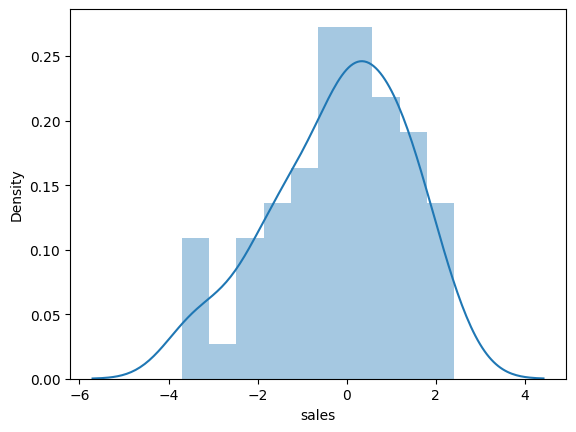

In [86]:
sns.distplot((y_test-predictions), bins=10);

In [87]:
# Try another linear regression model from scikit learn library.
from sklearn.linear_model import Ridge

In [88]:
# Poor Alpha Choice on purpose!
model = Ridge(alpha=100) 

The Alpha parameter controls the amount of shrinkage: the larger the value of alpha, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

In [89]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://scikit-learn.org/stable/_images/sphx_glr_plot_ridge_path_001.png")

In [90]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)

**Evaluation**

In [91]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.1327995527719885
MSE: 23.699015991998845
RMSE: 4.868163513276731


C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


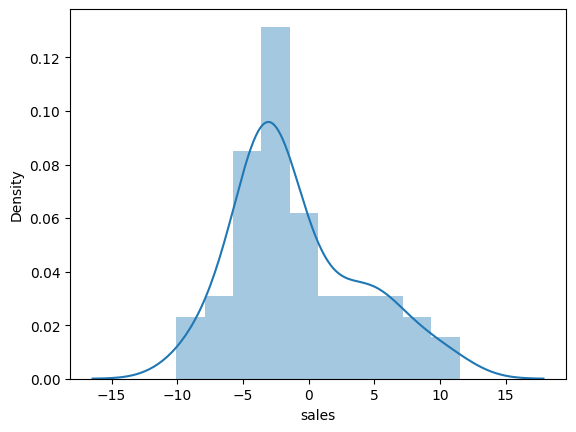

In [92]:
sns.distplot((y_test-predictions), bins=10);

**Adjust Parameters and Re-evaluate**

In [93]:
model = Ridge(alpha=1)

In [94]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)

**Evaluation**

In [95]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2691843374202567
MSE: 2.658871316005402
RMSE: 1.630604586037155


C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


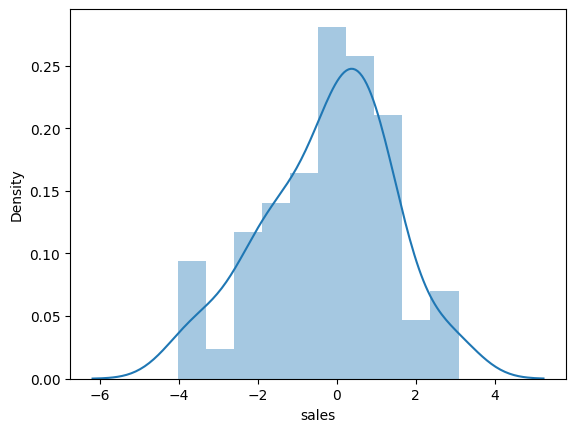

In [96]:
sns.distplot((y_test-predictions), bins=10);

Much better! We could repeat this until satisfied with performance metrics.

----
----
----
## Train | Validation | Test Split Procedure 

This is often also called a "hold-out" set, since you should not adjust parameters based on the final test set, but instead use it *only* for reporting final expected performance.

0. Clean and adjust data as necessary for X and y
1. Split Data in Train/Validation/Test for both X and y
2. Fit/Train Scaler on Training X Data
3. Scale X Eval Data
4. Create Model
5. Fit/Train Model on X Train Data
6. Evaluate Model on X Evaluation Data (by creating predictions and comparing to Y_eval)
7. Adjust Parameters as Necessary and repeat steps 5 and 6
8. Get final metrics on Test set (not allowed to go back and adjust after this!)

In [ ]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

We saw that Train | Test split method has a disadvantage of not having a portion of data that can report a performance metric on truly "unseen" data.

If we want a truly fair and final set of performance metrics, we should get these metrics from a final test set that we do not allow ourselves to adjust our model on.

The logic here to adjust hyperparameters on validation data until best performance is found. Then finally run benchmarks on test set without adjusting paramters further more.

The model was not fitted to the final test data and the model hyperparameters were not adjusted based off ifnal test data. This is truly never before seen data.

In [97]:
######################################################################
#### SPLIT TWICE! Here we create TRAIN | VALIDATION | TEST  #########
####################################################################
from sklearn.model_selection import train_test_split

# 70% of data is training data, set aside other 30%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=101)

In [98]:
# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101) 

In [ ]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

**Create Model**

In [99]:
# Poor Alpha Choice on purpose!
model = Ridge(alpha=100)

In [102]:
model.fit(X_train,y_train)

Ridge(alpha=100)

In [103]:
predictions = model.predict(X_eval)

**Evaluation**

In [104]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_eval, predictions))
print('MSE:', metrics.mean_squared_error(y_eval, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_eval, predictions)))

MAE: 1.1890890650561894
MSE: 2.355274696954342
RMSE: 1.534690423816589


C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


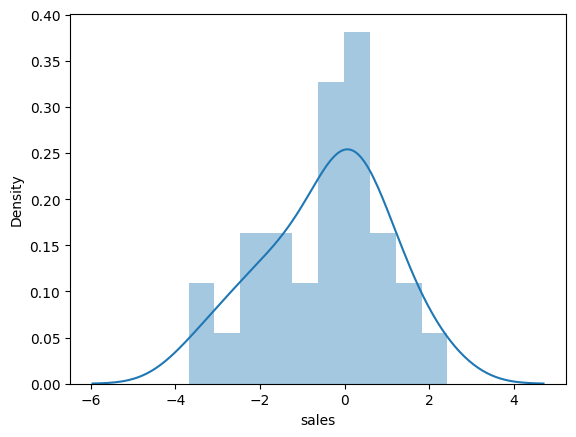

In [106]:
sns.distplot((y_eval-predictions), bins=10);

**Adjust Parameters and Re-evaluate**

In [107]:
model = Ridge(alpha=1)

In [108]:
model.fit(X_train,y_train)
predictions = model.predict(X_eval)

**Evaluation**

In [109]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_eval, predictions))
print('MSE:', metrics.mean_squared_error(y_eval, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_eval, predictions)))

MAE: 1.1895760485376143
MSE: 2.3564658270673906
RMSE: 1.5350784432944755


C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


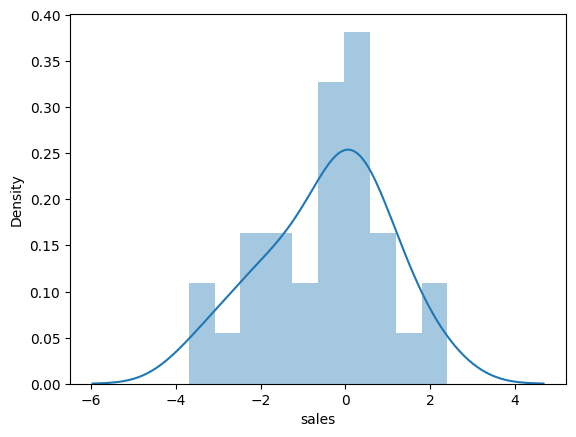

In [110]:
sns.distplot((y_eval-predictions), bins=10);

**Final Evaluation (Can no longer edit parameters after this!)**

In [112]:
predictions = model.predict(X_test) # Using X_test and y_test 

In [113]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2379160078337852
MSE: 2.240989030800084
RMSE: 1.4969933302456908


C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


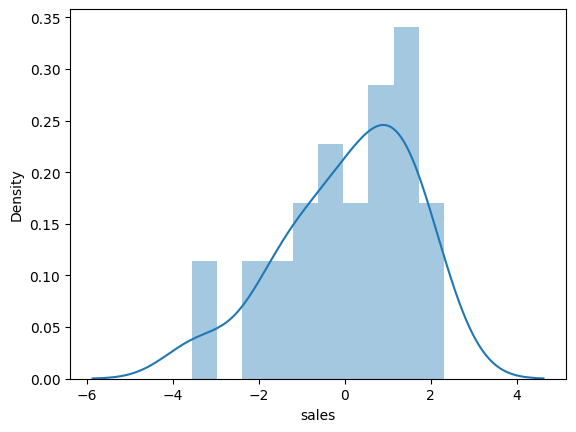

In [115]:
sns.distplot((y_test-predictions), bins=10);

----
----
----
## Cross Validation with cross_val_score

----

<img src="grid_search_cross_validation.png">

----

1. First we start with the entire data set. 
2. Split the data into training and test data.

3. After this, we're going to leave test-set for final evaluation (hold-out test dataset).

4. Choose K-Fold Split Value for spliting the training Data. (Large K = More computation, generally K=5, 10, ..).

5. Here K = 5: Train on K-1 Folds (5-1 = 4) and Validate results  on 1 Fold. You obtain the first error (1)
6. Repeat for another combination, untill all folds are tested (5 times = 5 errors).
7. Take mean of 5 errors and adjust parameters untill you're satisfied with the average (mean) error.

8. Finally evaluate on the final test set (we dont adjust hyperparamters).


The **cross_val_score** function uses a model and training set (along with a K value and a chosen performance metric e.g., RMSE) to perform all of this for us automatically!

This allows for K-Fold cross validation to be performed on any model.

In [117]:
# CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

In [118]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [119]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
model = Ridge(alpha=100)

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
# neg_mean_absolute_error (MAE) neg_mean_squared_error (MSE), neg_root_mean_squared_error (RMSE)
scores = cross_val_score(model,X_train,y_train,
                         scoring='neg_root_mean_squared_error',cv=5)

In [129]:
scores

array([-1.77626923, -1.25732646, -2.32477002, -1.48880651, -2.08975928])

In [124]:
# Average of the RMSE scores (we set back to positive since they are reported as negatives)
abs(scores.mean())

2.839902096319202

**Adjust model based on metrics**

In [125]:
model = Ridge(alpha=1)

In [126]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(model,X_train,y_train,
                         scoring='neg_root_mean_squared_error',cv=5)

In [128]:
scores

array([-1.77626923, -1.25732646, -2.32477002, -1.48880651, -2.08975928])

In [127]:
# Average of the MSE scores (we set back to positive)
abs(scores.mean())

1.787386297917656

**Final Evaluation (Can no longer edit parameters after this!)**

In [130]:
# Need to fit the model first!
model.fit(X_train,y_train)

Ridge(alpha=1)

In [133]:
predictions = model.predict(X_test)

In [134]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2168768443580582
MSE: 2.3190215794287514
RMSE: 1.5228334050147283


----
----
----

# Cross Validation with cross_validate

The **cross_validate** function allows us to view multiple performance metrics from cross validation on a model and explore how much time titting and testing took.

The cross_validate function differs from cross_val_score in two ways:

**It allows specifying multiple metrics for evaluation.**

It returns a dict containing fit-times, score-times in addition to the test score.

For single metric evaluation, where the scoring parameter is a string, callable or None, the keys will be:
        
        - ['test_score', 'fit_time', 'score_time']

And for multiple metric evaluation, the return value is a dict with the following keys:

    ['test_<scorer1_name>', 'test_<scorer2_name>', 'test_<scorer...>', 'fit_time', 'score_time']

return_train_score is set to False by default to save computation time. To evaluate the scores on the training set as well you need to be set to True.

In [135]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

In [136]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [137]:
# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
model = Ridge(alpha=100)

In [139]:
from sklearn.model_selection import cross_validate

In [140]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_validate(model,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error'],cv=5)

In [141]:
scores

{'fit_time': array([0.        , 0.00099707, 0.        , 0.0009973 , 0.00099754]),
 'score_time': array([0.00099802, 0.0009973 , 0.00099778, 0.00099707, 0.        ]),
 'test_neg_mean_absolute_error': array([-2.31243044, -1.74653361, -2.56211701, -2.01873159, -2.27951906]),
 'test_neg_mean_squared_error': array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
         -8.38562723]),
 'test_neg_root_mean_squared_error': array([-3.05377302, -2.22372714, -3.37589283, -2.65032273, -2.89579475])}

In [142]:
pd.DataFrame(scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.000000,0.000998,-2.312430,-9.325530,-3.053773
1,0.000997,0.000997,-1.746534,-4.944962,-2.223727
2,0.000000,0.000998,-2.562117,-11.396652,-3.375893
3,0.000997,0.000997,-2.018732,-7.024211,-2.650323
4,0.000998,0.000000,-2.279519,-8.385627,-2.895795


In [151]:
pd.DataFrame(scores).mean().abs()

fit_time                            0.000800
score_time                          0.000597
test_neg_mean_absolute_error        1.319685
test_neg_mean_squared_error         3.344839
test_neg_root_mean_squared_error    1.787386
dtype: float64

**Adjust model based on metrics**

In [144]:
model = Ridge(alpha=1)

In [145]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_validate(model,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error'],cv=5)

In [150]:
pd.DataFrame(scores).mean().abs()

fit_time                            0.000800
score_time                          0.000597
test_neg_mean_absolute_error        1.319685
test_neg_mean_squared_error         3.344839
test_neg_root_mean_squared_error    1.787386
dtype: float64

**Final Evaluation (Can no longer edit parameters after this!)**

In [147]:
# Need to fit the model first!
model.fit(X_train,y_train)

Ridge(alpha=1)

In [148]:
predictions = model.predict(X_test)

In [149]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2168768443580582
MSE: 2.3190215794287514
RMSE: 1.5228334050147283


# Grid Search 

We can search through a variety of combinations of hyperparameters with a grid search. 

While many linear models are quite simple and even come with their own specialized versions that do a search for you, this method of a grid search will can be applied to *any* model from sklearn, and we will need to use it later on for more complex models, such as Support Vector Machines (Classification).

Scikit-Learn includes a **GridSearchCV** class capable of testing a dictionary of multiple hyperparameter options through cross-validation. 

This allows for both croos-validation and a grid search to be performed in a generalized way for any model.

## Imports

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [156]:
df = pd.read_csv("Advertising.csv")

In [157]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Formatting Data

In [158]:
## CREATE X and y
X = df.drop('sales',axis=1)
y = df['sales']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model

In [159]:
from sklearn.linear_model import ElasticNet

Provides much freedom with more tunable parameters like the l1_ratio and alpha, both responsible for the quality of the linear model and the speed of obtaining the best fit.

In [161]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize='deprecated', precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet 

In [162]:
# With default parameters.
base_elastic_model = ElasticNet()

## Grid Search

A search consists of:

* an estimator (regressor or classifier) a model in our case;
* a parameter space;
* a method for searching or sampling candidates;
* a cross-validation scheme 
* a score function.

In [172]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1],
             'normalize' : [True, False]}

In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          verbose=2)

In [175]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END ............alpha=0.1, l1_ratio=0.1, normalize=True; total time=   0.0s
[CV] END ............alpha=0.1, l1_ratio=0.1, normalize=True; total time=   0.0s
[CV] END ............alpha=0.1, l1_ratio=0.1, normalize=True; total time=   0.0s
[CV] END ............alpha=0.1, l1_ratio=0.1, normalize=True; total time=   0.0s
[CV] END ............alpha=0.1, l1_ratio=0.1, normalize=True; total time=   0.0s
[CV] END ...........alpha=0.1, l1_ratio=0.1, normalize=False; total time=   0.0s
[CV] END ...........alpha=0.1, l1_ratio=0.1, normalize=False; total time=   0.0s
[CV] END ...........alpha=0.1, l1_ratio=0.1, normalize=False; total time=   0.0s
[CV] END ...........alpha=0.1, l1_ratio=0.1, normalize=False; total time=   0.0s
[CV] END ...........alpha=0.1, l1_ratio=0.1, normalize=False; total time=   0.0s
[CV] END ............alpha=0.1, l1_ratio=0.5, normalize=True; total time=   0.0s
[CV] END ............alpha=0.1, l1_ratio=0.5, n

C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and wi

[CV] END ............alpha=5, l1_ratio=0.99, normalize=False; total time=   0.0s
[CV] END ................alpha=5, l1_ratio=1, normalize=True; total time=   0.0s
[CV] END ................alpha=5, l1_ratio=1, normalize=True; total time=   0.0s
[CV] END ................alpha=5, l1_ratio=1, normalize=True; total time=   0.0s
[CV] END ................alpha=5, l1_ratio=1, normalize=True; total time=   0.0s
[CV] END ................alpha=5, l1_ratio=1, normalize=True; total time=   0.0s
[CV] END ...............alpha=5, l1_ratio=1, normalize=False; total time=   0.0s
[CV] END ...............alpha=5, l1_ratio=1, normalize=False; total time=   0.0s
[CV] END ...............alpha=5, l1_ratio=1, normalize=False; total time=   0.0s
[CV] END ...............alpha=5, l1_ratio=1, normalize=False; total time=   0.0s
[CV] END ...............alpha=5, l1_ratio=1, normalize=False; total time=   0.0s
[CV] END .............alpha=10, l1_ratio=0.1, normalize=True; total time=   0.0s
[CV] END .............alpha=

C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and wi

[CV] END ..........alpha=100, l1_ratio=0.95, normalize=False; total time=   0.0s
[CV] END ..........alpha=100, l1_ratio=0.95, normalize=False; total time=   0.0s
[CV] END ...........alpha=100, l1_ratio=0.99, normalize=True; total time=   0.0s
[CV] END ...........alpha=100, l1_ratio=0.99, normalize=True; total time=   0.0s
[CV] END ...........alpha=100, l1_ratio=0.99, normalize=True; total time=   0.0s
[CV] END ...........alpha=100, l1_ratio=0.99, normalize=True; total time=   0.0s
[CV] END ...........alpha=100, l1_ratio=0.99, normalize=True; total time=   0.0s
[CV] END ..........alpha=100, l1_ratio=0.99, normalize=False; total time=   0.0s
[CV] END ..........alpha=100, l1_ratio=0.99, normalize=False; total time=   0.0s
[CV] END ..........alpha=100, l1_ratio=0.99, normalize=False; total time=   0.0s
[CV] END ..........alpha=100, l1_ratio=0.99, normalize=False; total time=   0.0s
[CV] END ..........alpha=100, l1_ratio=0.99, normalize=False; total time=   0.0s
[CV] END ..............alpha

C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and w

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                         'normalize': [True, False]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [176]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1, normalize=False)

In [177]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1, 'normalize': False}

In [178]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000605,4.939114e-04,0.000594,0.000485,0.1,0.1,True,"{'alpha': 0.1, 'l1_ratio': 0.1, 'normalize': T...",-5.102932,-4.296365,-5.166773,-4.808065,-4.287419,-4.732311,0.379429,22
1,0.000997,1.168008e-07,0.000000,0.000000,0.1,0.1,False,"{'alpha': 0.1, 'l1_ratio': 0.1, 'normalize': F...",-1.858231,-1.185407,-2.406060,-1.478953,-2.155360,-1.816802,0.441897,7
2,0.000598,4.883441e-04,0.000200,0.000399,0.1,0.5,True,"{'alpha': 0.1, 'l1_ratio': 0.5, 'normalize': T...",-4.908672,-4.096226,-4.995511,-4.599846,-4.114494,-4.542950,0.380772,21
3,0.000997,3.234067e-07,0.000000,0.000000,0.1,0.5,False,"{'alpha': 0.1, 'l1_ratio': 0.5, 'normalize': F...",-1.823579,-1.194790,-2.365504,-1.470744,-2.109900,-1.792903,0.422096,6
4,0.000399,4.885776e-04,0.000399,0.000489,0.1,0.7,True,"{'alpha': 0.1, 'l1_ratio': 0.7, 'normalize': T...",-4.666963,-3.845491,-4.784679,-4.339044,-3.901857,-4.307607,0.383642,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.001190,3.856473e-04,0.000000,0.000000,100,0.95,False,"{'alpha': 100, 'l1_ratio': 0.95, 'normalize': ...",-5.579454,-4.748624,-5.581685,-5.288048,-4.658132,-5.171188,0.397651,27
80,0.000997,8.919710e-04,0.000199,0.000399,100,0.99,True,"{'alpha': 100, 'l1_ratio': 0.99, 'normalize': ...",-5.579454,-4.748624,-5.581685,-5.288048,-4.658132,-5.171188,0.397651,27
81,0.000399,4.885777e-04,0.000401,0.000491,100,0.99,False,"{'alpha': 100, 'l1_ratio': 0.99, 'normalize': ...",-5.579454,-4.748624,-5.581685,-5.288048,-4.658132,-5.171188,0.397651,27
82,0.000796,3.982307e-04,0.000598,0.000488,100,1,True,"{'alpha': 100, 'l1_ratio': 1, 'normalize': True}",-5.579454,-4.748624,-5.581685,-5.288048,-4.658132,-5.171188,0.397651,27


## Using Best Model From Grid Search

In [170]:
predictions = grid_model.predict(X_test)

In [171]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2229085652622884
MSE: 2.3873426420874737
RMSE: 1.5451027933724908
